<a href="https://colab.research.google.com/github/Jacobmunoz88/se-ales-y-sistemas/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
!pip install streamlit -q #instalación de librerías
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
#!pip install soundfile #librerias descarga Youtube y manejo de audios en python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
token = '2lLjMZza0oSVL6rk1HPGahn6C8a_3tBJpBFke5DPuFyWDJzkA'

In [ ]:
from pyngrok import ngrok

# Set authentication token (unique per user)
ngrok.set_auth_token(token)

# Start Streamlit server on a specific port
!nohup streamlit run parcial3.py --server.port 5011 &

# Start ngrok tunnel to expose the Streamlit server
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
 * Tunnel URL: https://3a3f-35-204-115-98.ngrok-free.app


In [ ]:
%%writefile parcial3.py

import streamlit as st
import pandas as pd
import numpy as np
import os
import subprocess
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from pyngrok import ngrok
import yt_dlp as youtube_dl
import joblib
from scipy.signal import lfilter, filtfilt
from scipy.fft import fft, fftfreq
from IPython.display import Audio
from scipy.io.wavfile import write
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import sympy as sym
from scipy.signal import butter as bw
from scipy.signal import freqz_zpk
from matplotlib.patches import Circle
from scipy.spatial.distance import cdist
import joblib
from google.colab import drive



def download_ytvid_as_mp3(custom_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = custom_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

def pagina1():
    st.title("Solucion pregunta 1")
    st.title("Saber que tipo de sistema es")
    st.write("Se requiere saber los valores de la m, k,c y sus equivalentes R, L, C si se escoge un el sistema como subamortiguado, con amortiguamiento crıtico, sobreamortiguado, oscilatorio e inestable.")
    st.write(r"Si se sabe que $\xi$ : factor de amortiguamiento.")
    st.write(r"""
    $0<\xi< 1$: SLIT subamortiguado.
    $\xi = 1$: SLIT con amortiguamiento crítico.
    $\xi > 1$: SLIT sobreamortiguado.
    $\xi = 0$: SLIT oscilatorio.
    $\xi < 0$: SLIT inestable (polos en el lado deracho del plano complejo $s$).
    """)

    import sympy as sym
    sym.init_printing()
    #definiri variables
    t= sym.symbols('t', real=True,positive=True)
    s = sym.symbols('s', complex=True)

    c = 1
    k = 1
    #forma canónica del slit
    a1 = c #CR en circuito equivalente
    ao = k # 1 en circuito equivalente
    xi = st.number_input("Valor del factor:", )  # Resistencia en ohmios
    if xi:
      if xi == 0:
        st.write("oscilatorio")
      elif 0 < xi < 1:
        st.write("subamortiguado")
      elif xi == 1:
        st.write("critico")
      elif xi > 1:
        st.write("sobreamortiguado")
      else:
        st.write("inestable")

      a2 = a1**2/(ao*(2*xi)**2)
      m = a2
      st.write(a2)
      Ko = 1/ao #ganancia circuito forma canónica
      wn = sym.sqrt(ao/a2)
      #función de transferencia
      H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)

      a2 = m #CL en circuito equivalente
      #calcular polos
      p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
      p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)

      #Reemplazando los valores
    # mck = {m: 4.0, c: 1.0, k: 1.0}

      print('p1=',p1)
      print('p2=',p2)
      print('xi=',xi)
      print('omega_n=',wn)

      #gráfica polos y ceros paquete de control de sympy
      from sympy.physics.control.lti import TransferFunction
      from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
      num,den=sym.fraction(H)


      tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC


      # Título en Streamlit
      st.title("Análisis de Sistemas en el Dominio de la Frecuencia")

      # Elegir el tipo de gráfico
      st.write("### Selecciona el gráfico:")
      option = st.selectbox("Gráfico", ["Polos y Ceros", "Diagrama de Bode", "Respuesta al Impulso", "Respuesta al Escalón"])

      # Graficar según la opción seleccionada
      if option == "Polos y Ceros":
          fig, ax = plt.subplots()
          pole_zero_plot(tf1, ax=ax)
          st.pyplot(fig)

      elif option == "Diagrama de Bode":
          fig, ax = plt.subplots()
          bode_plot(tf1)
          st.pyplot(fig)

      elif option == "Respuesta al Impulso":
          fig, ax = plt.subplots()
          impulse_response_plot(tf1,upper_limit=5/(xi*wn))
          st.pyplot(fig)

      elif option == "Respuesta al Escalón":
          fig, ax = plt.subplots()
          step_response_plot(tf1,upper_limit=5/(xi*wn))
          st.pyplot(fig)

      st.write()

def pagina2():
  st.title("Solucion pregunta 2")
  st.title("Graficador y Reproductor de la modulacion y demodulacion de una cancion de youtube")
  st.write("Se usara solo 5 segundos de la cancion que se escoja para la modulacio y demodulacion")
  st.write("se uso el siguiente esquema para la demodulacion ")



  st.write("subir un archivo excel con las siguentes caracteristicas, url de la cancion, nombre de la banda, tipo de genero")
  custom_url = st.text_input("Enter a new YouTube URL to process:", "")
  if custom_url:
      name= 'results/'+"cancion1"
      download_ytvid_as_mp3(custom_url,name)
      subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])
      nombre_out = "output.wav"
      x, fs = sf.read(name+'.wav')
      path = 'results/'
      wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]


      #leer archivos y crear np.array audios
      fs = 48000
      tl = np.array([20])
      ts = 5 #t segmento
      Ns = len(wav_files)*len(tl) #cantidad segmentos
      x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
      label = np.zeros((Ns,1)) #vector tipo de genero
      name_c = []
      #leer archivos wav
      i = 0

      for ti in tl: #segmentos de tiempo
          x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
          name_c += [name[:-6]]
          print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}")
          i+=1

      st.audio(name+'.mp3')

      st.write("Fragmento del audio")

      aa= x_t[0]
      write("aa.wav", fs, aa.astype(np.float32))

      st.audio("aa.wav")

      #tomamos canal 1 para generar la modulación
      xm = x_t[0,:,0]

      Fc = 15000 #frecuencia de portadora
      t = np.arange(0,ts,1/fs) #vector del tiempo
      Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

      Ac = max(abs(xm))/Im #amplitud de la portadora según índice de modulación
      c = Ac*np.sin(2*np.pi*Fc*t) #portadora

      y = (1+xm/Ac)*c #señal modulada en AM

      Xfc = np.fft.fft(c)
      Xfm = np.fft.fft(xm)
      Xfy = np.fft.fft(y)

      vfre = np.fft.fftfreq(len(c),1/fs)
      #demodulacion
      f_o = 15000 #frecuencia de portadora
      Ai = 4
      carrier = np.cos(2*np.pi*f_o*t)
      entrada= Ai*y*carrier
      mixed_signal= entrada*carrier # Multiplicación con la portadora


      Wn = [14000] #banda pasante
      out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
      filt = "lowpass"
      N = 10
      zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)

      w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K
      num, dem = bw(N, Wn, btype=filt, fs=fs)
      xf = lfilter(num, dem, mixed_signal, axis=0)
      yy=(2/Ai)*xf

      st.write("demodulada")
      write("yy.wav", fs, yy.astype(np.float32))
      st.audio("yy.wav")



      def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
        ax1.plot(w, 20 * np.log10(abs(h)), 'b')
        ax1.set_ylabel('Amplitude [dB]', color='b')
        ax1.set_xlabel('Frequency [Hz]')
        ax1.grid()
        ax2 = ax1.twinx()
        angles = np.unwrap(np.angle(h))
        ax2.plot(w, angles, 'g')
        ax2.set_ylabel('Angle [radians]', color='g')
        plt.axis('tight')
        st.pyplot(plt)

      def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
        ax = plt.gca()

        ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
        ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
        unit_circle = Circle((0,0), radius=1, fill=False,
                              color='black', ls='solid', alpha=0.9)
        ax.add_patch(unit_circle)
        ax.axvline(0, color='0.7')
        ax.axhline(0, color='0.7')

        plt.title(title)
        plt.xlabel(r'Re{$z$}')
        plt.ylabel(r'Im{$z$}')
        plt.axis('equal')
        plt.xlim((-2, 2))
        plt.ylim((-2, 2))
        st.pyplot(plt)

      st.write("### Selecciona el gráfico:")
      option = st.selectbox("Gráfico", ["portadora y del mensaje", "modulada en AM", "espectro", "polos y ceros", "filtro", "demodulada"])
      # Graficar según la opción seleccionada
      if option == "portadora y del mensaje":
          st.write('# Grafica de la señal portadora y del mensaje')
          plt.plot(t,c,label='portadora')
          plt.plot(t,xm,label='mensaje')
          plt.xlabel('t [s]')
          plt.ylabel('Amplitud')
          plt.legend()
          st.pyplot(plt)

          #reproducir portadora
          write("c.wav", fs, c.astype(np.float32))

          st.audio("c.wav")

      elif option == "modulada en AM":
          st.write('# Señal modulada en AM')
          plt.plot(t,y)
          plt.xlabel('$t[s]$')
          plt.ylabel('$y(t)$')
          st.pyplot(plt)

          #reproducir modulada
          write("y.wav", fs, y.astype(np.float32))

          st.audio("y.wav")

      elif option == "espectro":
          st.write("# Señal del espectro")
          plt.plot(vfre,abs(Xfy),label='modulada')
          plt.plot(vfre,abs(Xfm),label='mensaje')
          plt.plot(vfre,abs(Xfc),label='portadora')
          plt.legend()
          plt.xlabel('$f [Hz]$')
          plt.ylabel('$|X(f)|$')
          plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
          st.pyplot(plt)
          # Elegir el tipo de gráfico
      elif option == "polos y ceros":
          st.write("polos y ceros ")
          show_zp(zeros, poles, title='Polos y Ceros')
      elif option == "filtro":
          st.write("filtro")
          plot_freq_response('Butterworth', w, h, N)
          st.write("audio con lowpass")
          write("xf.wav", fs, xf.astype(np.float32))
          st.audio("xf.wav")
      elif option == "demodulada":
          plt.plot(t,yy)
          plt.xlabel('$t[s]$')
          plt.ylabel('$y(t)$')
          st.pyplot(plt)






paginas = {
    "Página 1": pagina1, "Pagina 2": pagina2}


# Barra lateral para seleccionar la página
st.sidebar.title("Navegación")
opcion = st.sidebar.radio("Selecciona una página", list(paginas.keys()))

# Mostrar el contenido de la página seleccionada
paginas[opcion]()


Overwriting parcial3.py


In [ ]:
drive.mount('/content/drive')
# ID del archivo de Google Drive
file_id = "1kLqlK_lPDI54F1JLuwlAlzoGFR8tpv72"
output = "rock_vs_pop.xlsx"

# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

In [ ]:
#detector de genero musical
      from google.colab import files
      from datetime import date, datetime
      import shutil
      filename_ = 'rock_vs_pop'
      my_model_loaded = joblib.load(filename_+'.pkl')
      #leer archivos y crear np.array audios
      fs = 48000
      tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
      ts = 5 #t segmento
      Ns = len(wav_files)*len(tl) #cantidad segmentos
      x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
      label = np.zeros((Ns,1)) #vector tipo de genero
      name_c = []
      #leer archivos wav
      i = 0
      for name in wav_files:#lectura audio .wav
          x, fs = sf.read(path+name)
          for ti in tl: #segmentos de tiempo
              x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
              label[i] = int(name[-5]) #tipo de genero
              name_c += [name[:-6]]
              print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
              i+=1
      x_t.shape

      #calculo de fourier

      vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
      Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
      from sklearn.preprocessing import MinMaxScaler
      sca = MinMaxScaler()
      Xw_i = sca.fit_transform(abs(Xw).T).T
      dista= cdist(Xw_i,my_model_loaded['Xw_'])
      ind_ = np.argmin(dista, axis=0)
      #rr= my_model_loaded['name_c'][ind_]
      gen=my_model_loaded['label'][ind_]
      st.write(gen)


In [ ]:
if gen == 1:
        st.write("la cancion es de genero rock")
      elif gen == 2:
        st.write("la cancion es de genero pop")
      else :
        st.write("la cancion no es de genero rock ni pop")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

     \ 2.7 MB 6.0 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.1

Downloading...
From (original): https://drive.google.com/uc?id=1poIEjFP3okDxSRrxKeRCCzRbemUetCnhYj0kq8_3aCM
From (redirected): https://docs.google.com/spreadsheets/d/1poIEjFP3okDxSRrxKeRCCzRbemUetCnhYj0kq8_3aCM/export?format=xlsx
To: /content/detectorcanciones.xlsx
5.89kB [00:00, 10.2MB/s]

Carpeta results ya existe
video 1 de 10
link: https://youtu.be/ABbggjVQm6A?si=1vT9A4cQ31blWOFJ

band: Maneskin

type: Rock

[youtube] Extracting URL: https://youtu.be/ABbggjVQm6A?si=1vT9A4cQ31blWOFJ
[youtube] ABbggjVQm6A: Downloading webpage


[youtube] ABbggjVQm6A: Downloading ios player API JSON
[youtube] ABbggjVQm6A: Downloading web creator player API JSON
[youtube] ABbggjVQm6A: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ABbggjVQm6A
[youtube] ABbggjVQm6A: Downloading webpage
[youtube] ABbggjVQm6A: Downloading ios player API JSON
[youtube] ABbggjVQm6A: Downloading web creator player API JSON
[youtube] ABbggjVQm6A: Downloading m3u8 information
[info] ABbggjVQm6A: Downloading 1 format(s): 251
[download] results/Maneskin_0_1.mp3 has already been downloaded
[download] 100% of    2.89MiB
Download complete... results/Maneskin_0_1.mp3
video 2 de 10
link: https://youtu.be/Hkg-KMhVVok?si=eB6HaE-Wqjgfw_wm

band: Maneskin

type: Rock

[youtube] Extracting URL: https://youtu.be/Hkg-KMhVVok?si=eB6HaE-Wqjgfw_wm
[youtube] Hkg-KMhVVok: Downloading webpage
[youtube] Hkg-KMhVVok: Downloading ios player API JSON
[youtube] Hkg-KMhVVok: Downloading web creator player API JSON
[youtube] Hkg-KMhVVok: D

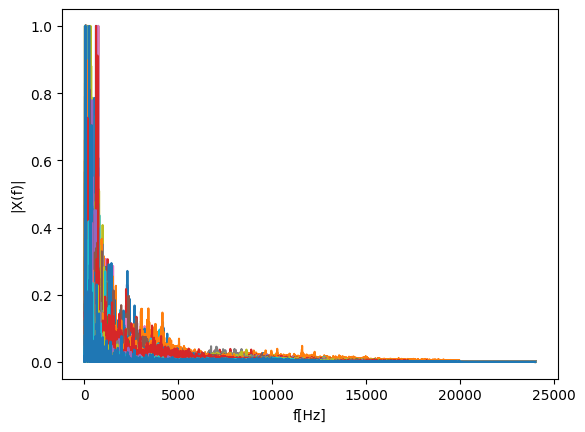

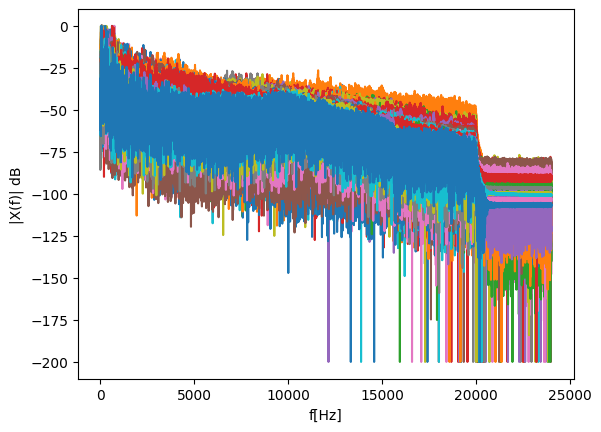

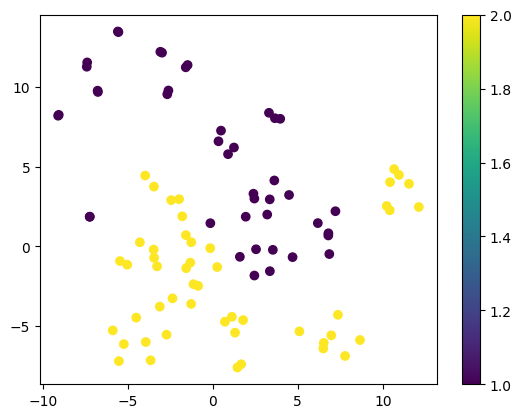

<ipython-input-28-af46b46bec51>:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


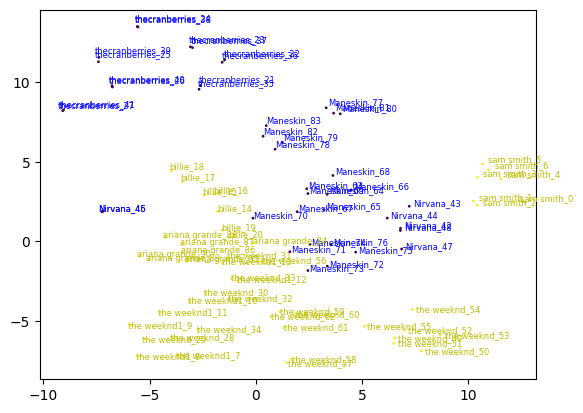

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])

In [ ]:
import gdown

# ID del archivo de Google Drive
file_id = "1poIEjFP3okDxSRrxKeRCCzRbemUetCnhYj0kq8_3aCM"
output = "detectorcanciones.xlsx"

# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'detectorcanciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

import os
import yt_dlp as youtube_dl



#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))



import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

import joblib
#guardar modelo
os.mkdir('modelo')
filename_ = 'modelo/rock_vs_pop'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")

#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()


In [ ]:
data = joblib.load(filename_+".pkl")
data.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])

In [ ]:
pip install sounddevice